In [ ]:
 !pip install diffusers transformers gradio accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 MB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 71.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 40.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127

In [ ]:
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt
import torch

In [ ]:
model_id1 = "dreamlike-art/dreamlike-diffusion-1.0"
model_id2 = "stabilityai/stable-diffusion-x1-base-1.0"

pipe = StableDiffusionPipeline.from_pretrained(model_id1, torch_dtype=torch.float16, use_safetensors=True)
pipe = pipe.to("cuda")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/511 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/807 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/901 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
prompt = """Puppy sitting in a chair with a kitten"""

In [ ]:
image = pipe(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

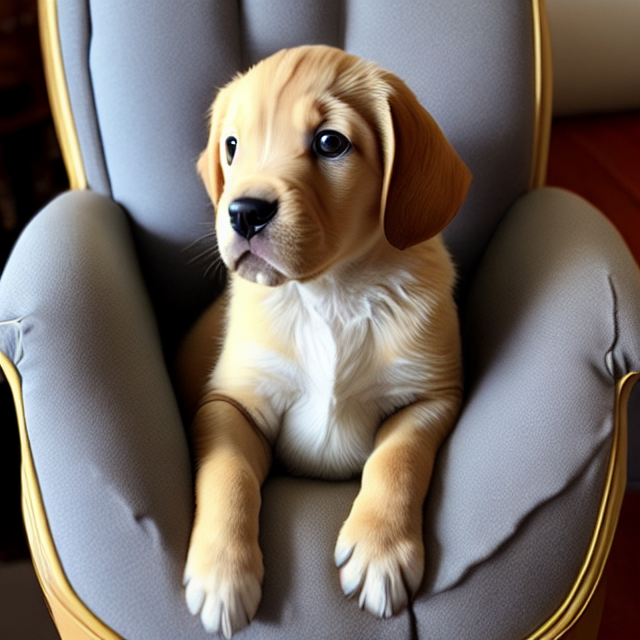

In [ ]:
image

[PROMPT]:  Puppy sitting in a chair with a kitten


(np.float64(-0.5), np.float64(639.5), np.float64(639.5), np.float64(-0.5))

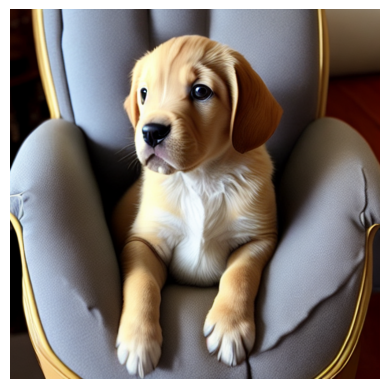

In [ ]:
print("[PROMPT]: ", prompt)
plt.imshow(image)
plt.axis('off')

In [ ]:
 prompt2 = """Beautiful flower"""
 image = pipe(prompt2).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

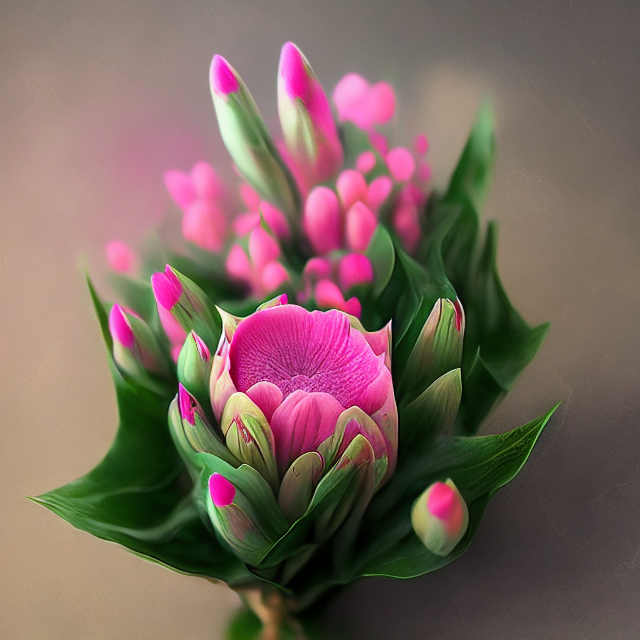

In [ ]:
image

[PROMPT]:  Beautiful flower


(np.float64(-0.5), np.float64(639.5), np.float64(639.5), np.float64(-0.5))

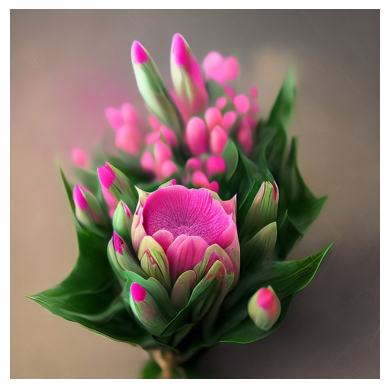

In [ ]:
print('[PROMPT]: ', prompt2)
plt.imshow(image)
plt.axis('off')

## Working with Stable Diffusion Parameters

 - Negative Prompting
 - num_interference_steps
 - height
 - weight
 - num_images_per_prompt

In [ ]:
def generate_image(pipe, prompt, params):
  img = pipe(prompt, **params).images

  num_images = len(img)
  if num_images>1:
    fig, ax = plt.subplots(nrows=1, ncols=num_images)
    for i in range(num_images):
      ax[i].imshow(img[i])
      ax[i].axis('off')

  else:
    fig = plt.figure()
    plt.imshow(img[0])
    plt.axis('off')
  plt.tight_layout()

In [ ]:
prompt = "dreamlike, beautiful kingfisher flying low just above the water"
params = {}

  0%|          | 0/50 [00:00<?, ?it/s]

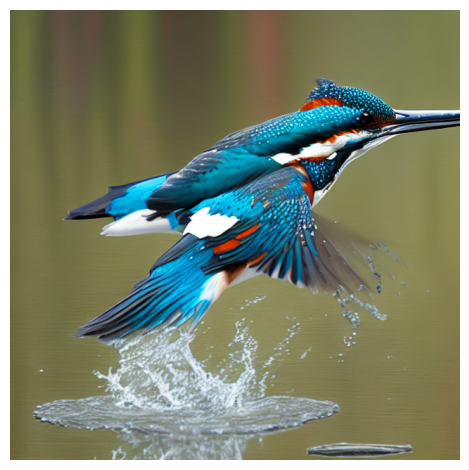

In [ ]:
generate_image(pipe, prompt, params)

  0%|          | 0/100 [00:00<?, ?it/s]

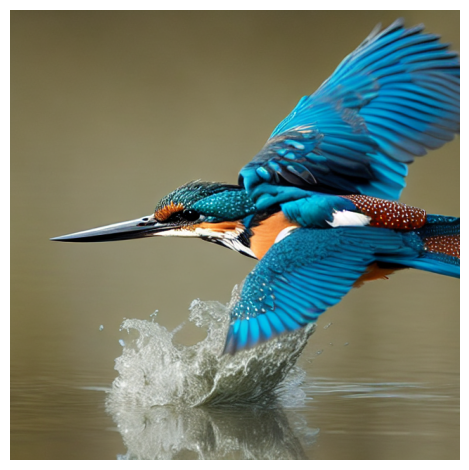

In [ ]:
# no of inference steps
params = {'num_inference_steps': 100}
generate_image(pipe, prompt, params)

  0%|          | 0/100 [00:00<?, ?it/s]

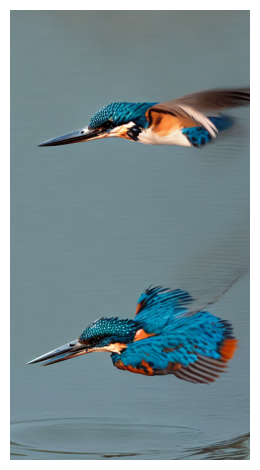

In [ ]:
# Height Width
params = {'num_inference_steps': 100, 'width':512, 'height': int(1.5*640)}
generate_image(pipe, prompt, params)

  0%|          | 0/100 [00:00<?, ?it/s]

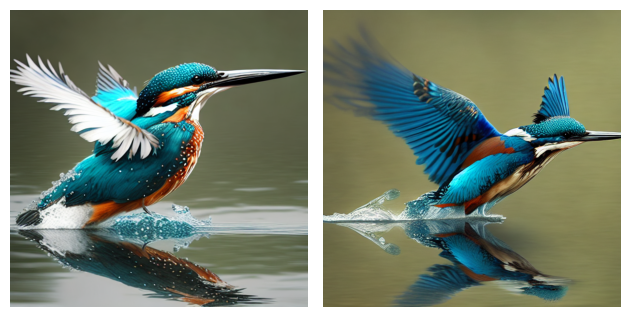

In [ ]:
# No of images per prompt
params = {'num_inference_steps': 100, 'num_images_per_prompt': 2}
generate_image(pipe, prompt, params)

  0%|          | 0/100 [00:00<?, ?it/s]

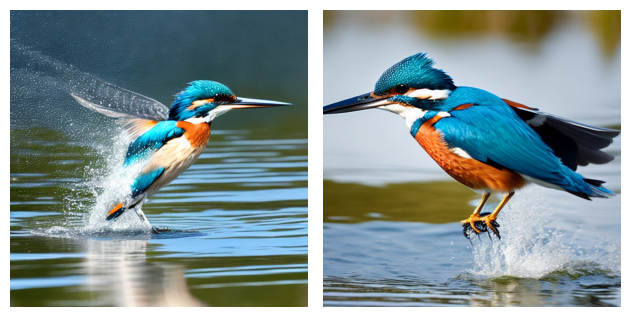

In [ ]:
#Negative prompt
params = {'num_inference_steps': 100, 'num_images_per_prompt': 2, 'negative_prompt': 'ugly, gore, distorted, low quality'}
generate_image(pipe, prompt, params)